In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Overview

### Read the Dataset

In [2]:
column_names = [
    'ID',                    # Column 1: ID of the statement
    'Label',                 # Column 2: Label
    'Statement',             # Column 3: Statement
    'Subject',               # Column 4: Subject(s)
    'Speaker',               # Column 5: Speaker
    'Speaker Job Title',     # Column 6: Speaker's Job Title
    'State Info',            # Column 7: State Info
    'Party Affiliation',     # Column 8: Party Affiliation
    'Barely True Count',     # Column 9: Barely True Counts
    'False Count',           # Column 10: False Counts
    'Half True Count',       # Column 11: Half True Counts
    'Mostly True Count',     # Column 12: Mostly True Counts
    'Pants on Fire Count',   # Column 13: Pants on Fire Counts
    'Context'                # Column 14: Context (venue / location of the speech or statement)
]

In [3]:
def read_dataframe(tsv_file: str) -> pd.DataFrame : 
    # creates a "dataframe" or "df" for short. This is similar to a 2-D python dict.
    df = pd.read_csv(tsv_file, delimiter='\t')
    ## Numerical Filled missing values with 0
    numeric_columns = df.select_dtypes(include=['number']).columns
    df[numeric_columns] = df[numeric_columns].fillna(0)
    ## Categorical Filled missing values with an empty string
    string_columns = df.select_dtypes(include=['object']).columns
    df[string_columns] = df[string_columns].fillna("")
    # labels the columns in the dataset using the data dictionary described in the README
    df.columns = column_names
    return df

In [4]:
df_train = read_dataframe('train.tsv')

In [5]:
df_train.head()

,ID,Label,Statement,Subject,Speaker,Speaker Job Title,State Info,Party Affiliation,Barely True Count,False Count,Half True Count,Mostly True Count,Pants on Fire Count,Context
0,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
1,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
2,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,,,none,7.0,19.0,3.0,5.0,44.0,a news release
3,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN
4,12465.json,true,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10239 entries, 0 to 10238
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10239 non-null  object 
 1   Label                10239 non-null  object 
 2   Statement            10239 non-null  object 
 3   Subject              10239 non-null  object 
 4   Speaker              10239 non-null  object 
 5   Speaker Job Title    10239 non-null  object 
 6   State Info           10239 non-null  object 
 7   Party Affiliation    10239 non-null  object 
 8   Barely True Count    10239 non-null  float64
 9   False Count          10239 non-null  float64
 10  Half True Count      10239 non-null  float64
 11  Mostly True Count    10239 non-null  float64
 12  Pants on Fire Count  10239 non-null  float64
 13  Context              10239 non-null  object 
dtypes: float64(5), object(9)
memory usage: 1.1+ MB


In [8]:
def show_news_article(input_df: pd.DataFrame, index: int) -> None:
    """
    Most relevant columns analysis
    
    Parameter
    ---------
    `index`: the row in original dataset
    """
    print(f"speaker: {input_df.iat[index, 4]}")
    print(f"subject(s): {input_df.iat[index, 3]}")
    print(f"statement: {input_df.iat[index, 2]}")
    print(f"label: {input_df.iat[index, 1]}")

In [9]:
show_news_article(df_train, 1)

speaker: barack-obama
subject(s): foreign-policy
statement: Hillary Clinton agrees with John McCain "by voting to give George Bush the benefit of the doubt on Iran."
label: mostly-true


### Explore the Dataset and Analysis

In [10]:
def plotbh(df, col):
    '''Draw boxplot and histogram for numerical variables'''
    fig, axs = plt.subplots(1, 2, figsize=(18, 6))

    # Boxplot
    sns.boxplot(x=df[col], ax=axs[0])
    axs[0].set_title('Box chart of ' + col)

    # Histogram
    sns.histplot(data=df, x=col, kde=True, ax=axs[1])
    axs[1].set_title('Histogram of ' + col)

    plt.tight_layout()
    plt.show()

In [11]:
df_train['statement_words'] = df_train['Statement'].apply(lambda x : len(x.split()))
df_train['statement_words'].describe()

count    10239.000000
mean        18.010743
std          9.658795
min          2.000000
25%         12.000000
50%         17.000000
75%         22.000000
max        467.000000
Name: statement_words, dtype: float64

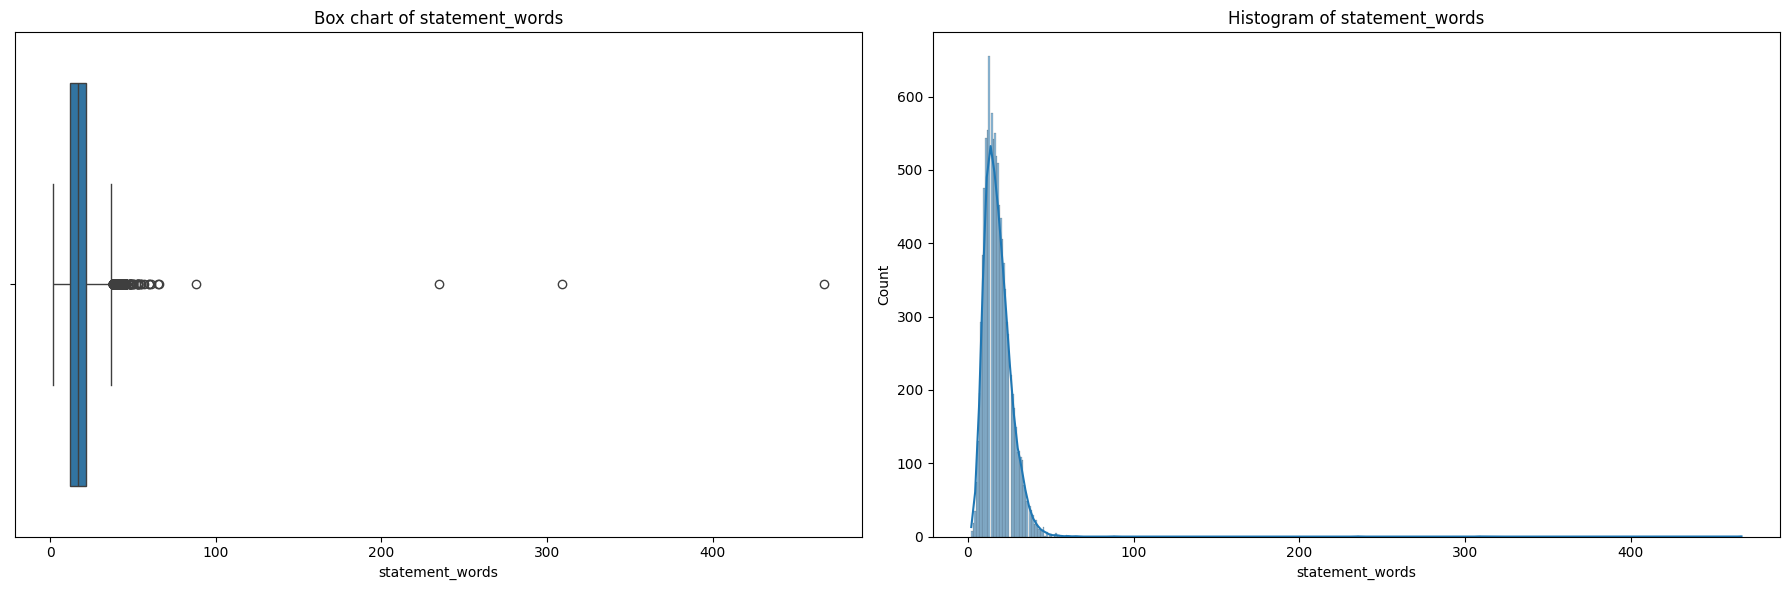

In [12]:
plotbh(df_train, 'statement_words')

#### Label Analysis

Code idea comes from [Kaggle](https://www.kaggle.com/code/hendrixwilsonj/liar-data-analysis#Exporting-our-model)

In [13]:
def label_bar_chart(input_df: pd.DataFrame, title: str = "LIAR Dataset") -> None:
    # computes frequencies of labels and converts to percentages
    label_frequencies = input_df['Label'].value_counts(normalize=True)
    
    def multiply_100(x):
        return x * 100
    
    # "apply" is a handy way to call a function on every row of data.
    label_frequencies = label_frequencies.apply(multiply_100)
    
    # bar chart ordering and  colors for readability.
    labels = ['pants-fire', 'false', 'barely-true', 'half-true', 'mostly-true', 'true']
    colors = [
        'orangered', # pants-fire
        'coral', # false
        'salmon', # barely-true
        'peachpuff', # half-true
        'skyblue', # mostly-true
        'deepskyblue' # true
    ]
    label_frequencies = label_frequencies.reindex(index = labels)
    
    # creates a horizontal bar chart with a descriptive title
    axis = label_frequencies.plot(kind='barh', figsize=(8, 4), color=colors)
    axis.set_xlabel('Percentage')
    axis.set_title(f"Distribution of label values [{title}, sample_size={len(input_df)}]", size=10)

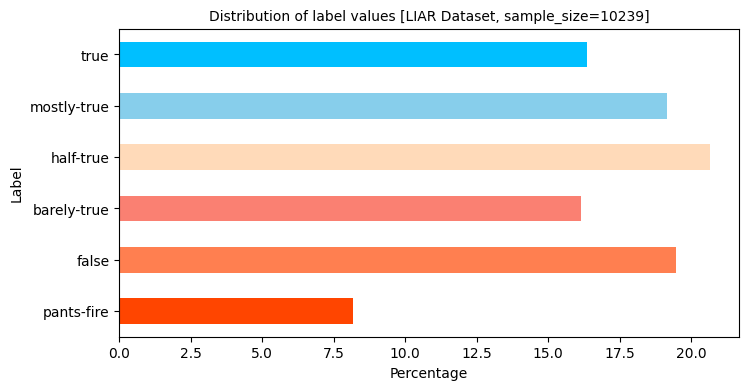

In [14]:
label_bar_chart(df_train)

#### Speaker Analysis

In [15]:
num_speakers = df_train['Speaker'].nunique()
avg_statments = len(df_train) / num_speakers

print(f"Unique speakers in dataset: {num_speakers}")
print(f"Average statements made per speaker: {avg_statments}")

Unique speakers in dataset: 2910
Average statements made per speaker: 3.5185567010309278


In [16]:
df_train['Speaker'].unique()

array(['scott-surovell', 'barack-obama', 'blog-posting', ...,
       'john-rafferty', 'richard-tomlins', 'alan-powell'], dtype=object)

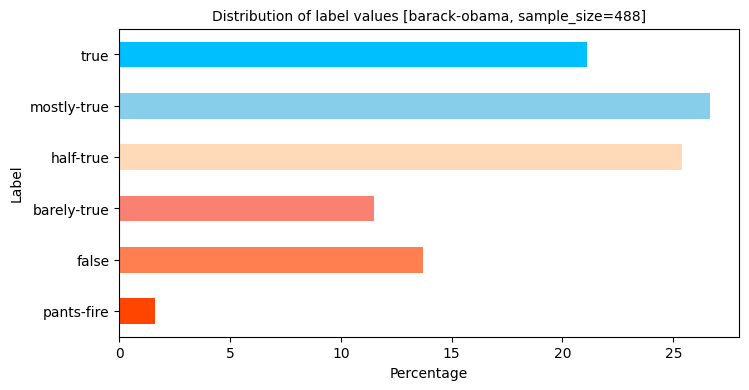

In [17]:
def speaker_bar_chart(input_df: pd.DataFrame, speaker: str) -> pd.DataFrame:
    
    # filters the input_df
    speaker_df = input_df[ input_df['Speaker'] == speaker ]
    speaker_df.reset_index(inplace=True)
    
    # calls the bar chart function we created earlier
    label_bar_chart(speaker_df, title=speaker)
    
    return speaker_df
    

# create a bar chart over labels for a single speaker. Store the returned dataframe to a variable.
ret_df = speaker_bar_chart(df_train, 'barack-obama')

#### Subject Analysis

In [18]:
# creates a new dataframe that only contains the label and subjects columns.
subject_df = df_train[['Label', 'Subject']].copy()


def csv_to_list(x):
    # start by turning the comma-separated values into a list of values
    return x.split(",")


subject_df['Subject'] = subject_df['Subject'].apply(csv_to_list)

subject_df = subject_df.explode('Subject')

subject_df.head()

,Label,Subject
0,half-true,energy
0,half-true,history
0,half-true,job-accomplishments
1,mostly-true,foreign-policy
2,false,health-care


In [19]:
num_unique_subjects = subject_df['Subject'].nunique()

print(f"Unique subjects in dataset: {num_unique_subjects}")

Unique subjects in dataset: 143


In [20]:
subject_df['Subject'].unique()

array(['energy', 'history', 'job-accomplishments', 'foreign-policy',
       'health-care', 'economy', 'jobs', 'education',
       'candidates-biography', 'ethics', 'message-machine-2014',
       'voting-record', 'elections', 'new-hampshire-2012', 'poverty',
       'state-budget', 'federal-budget', 'financial-regulation', 'water',
       'bankruptcy', 'population', 'income', 'corporations', 'taxes',
       'message-machine', 'abortion', 'crime', 'diversity',
       'homeland-security', 'terrorism', 'technology',
       'campaign-advertising', 'labor', 'states', 'unions', 'workers',
       'climate-change', 'environment', 'government-regulation',
       'small-business', 'bipartisanship', 'consumer-safety',
       'corrections-and-updates', 'market-regulation', 'supreme-court',
       'city-government', 'military', 'pop-culture', 'debt',
       'legal-issues', 'stimulus', 'pundits', 'women', 'immigration',
       'deficit', 'iraq', 'patriotism', 'campaign-finance',
       'gays-and-lesbi

In [21]:
def subject_bar_chart(input_df: pd.DataFrame, subject: str) -> pd.DataFrame:
    
    # filters the input_df
    ret_df = input_df[ input_df['Subject'] == subject ]
    ret_df.reset_index(inplace=True)
    
    # calls the bar chart function we created earlier
    label_bar_chart(ret_df, title=subject)
    
    return ret_df


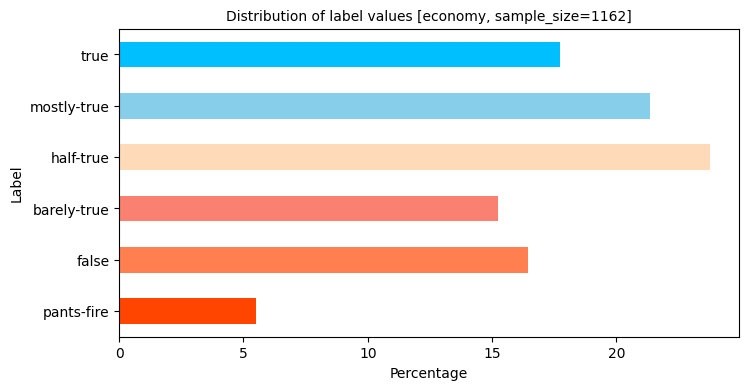

In [22]:
# create a bar chart over labels for a single subject. Store the returned dataframe to a variable.
ret_df = subject_bar_chart(subject_df, 'economy')

Current Conclusion:

The dataset covered multiple topics and labeled manually by professional and identified people. All the statements not include long content which may exceed most LLM models ability, but focus on the claims based on given context. I believe that is strategic idea for constructing more powerful models.